# Проект "Качество идей, сгенерированных студентами в рамках образовательного эксперимента"

**Описание проекта:**

В Школе перспективных исследований ТюмГУ в рамках дисциплины Дизайн-мышление был проведен образовательный эксперимент. Гипотеза эксперимента заключается в том, что на качество идей, которые генерят студенты в рамках своих проектов, оказывает влияние ресурс, который был им обеспечен в начале этапа «генерация идей». В эксперименте одна группа студентов (17 человек) пользовалась сервисами на искусственном интеллекте, в частности ChatGPT, чтобы создать больше подходящих идей, а вторая группа (18 человек) слушала 2 лекции (40 и 90 минут) от экспертов на тему изменений, которые происходят в мире в последние 20-30 лет (технологии, отношения, рынки, бизнес, люди). Лекции напрямую не имели отношения к проектам студентов, эксперты не консультировали студентов. Остальные занятия студентов проходили идентично, группы сопоставимы по своему составу (включают как академически успешных, так и не очень успешных студентов, дисциплинированных и нет, все студенты выбирали проекты, которые для них субъективно важны, в каждой группе были и командные, и индивидуальные проекты). Идеи, которые сгенерили студенты, были собраны и оценены по шкале от 0 до 2 по критериям: новизна (0-популярная, используемая (возможно широко внедряемая) идея, 1 – обсуждаемая, но не внедренная или вторичная идея, 2 – новая идея)  и эффективность (0 – дает незначительный эффект для пользователя в соответствии с его задачами и потребностями, болями, 1 – дает заметный эффект для пользователя, 2 – существенно улучшит опыт пользователя). Необходимо определить, какой ресурс обеспечил лучшие идеи (по новизне и эффективности) и существенна ли разница.
Данные по исследованию занесены в таблицу, которая будет использована для анализа.

**Цель исследования:** определить, какой ресурс(искусственный интеллект или экспертное мнение) сильнее влияет на качество генерируемых студентами идей

**Декомпозиция:**
   1. Загрузка данных.
   2. Предобработка данных:
        - переименование столбцов,
        - проверка на дубликаты,
        - проверка на пропуски,
        - проверка уникальных значений в датафрейме,
        - приведение значений к нужному типу.
   3. Проверка гипотезы.
   4. Исследовательский анализ данных:
        - оценка новизны идей,
        - оценка эффективности идей,
        - оценка новизны решений,
        - оценка эффективности решений.
   5. Общий вывод.

## 1. Загрузка данных

Импортируем нужные библиотеки

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
pd.set_option('display.float_format', '{:.2f}'.format)

Открываем файл

In [2]:
data = pd.read_csv('/Users/evgeniyakoreshilova/Downloads/ideas.csv')
data.head()

,тема,ресурс,идеи,"оценка новизны идеи\n0 - популярная, используется (возможно широко)\n1 - вторичная, обсуждаемая, но не внедренная\n2 - новая",оценка эффективности идеи\n0 - даст незначительный эффект\n1 - даст заметный эффект\n2 - существенно улучшит опыт пользователей и/или показатели организации,решения,"оценка новизны решения\n0 - популярная, используется (возможно широко)\n1 - вторичная, обсуждаемая, но не внедренная\n2 - новая",оценка эффективности решения\n0 - даст незначительный эффект\n1 - даст заметный эффект\n2 - существенно улучшит опыт пользователей и/или показатели организации
0,оценка дисциплин в SAS (COURSE EVALUATION),ИИ,Администрация пишет комплименты и поощрения пе...,1,0,Новая страница на сайте SAS со всеми изменения...,2.00,2.00
1,оценка дисциплин в SAS (COURSE EVALUATION),ИИ,Day inverse.День обратный. Учащиеся читают сво...,1,1,Коллекционирование лягушек: геймификация,0.00,1.00
2,оценка дисциплин в SAS (COURSE EVALUATION),ИИ,Концерт,2,1,Новая Teaching Policy: заполнение в классе,0.00,0.00
3,оценка дисциплин в SAS (COURSE EVALUATION),ИИ,"Организовывать встречи со студентами, когда ре...",0,2,Новые переформулированные вопросы и порядок во...,0.00,2.00
4,оценка дисциплин в SAS (COURSE EVALUATION),ИИ,Нарисованный отчет,2,2,NaN,NaN,NaN


## 2. Предобработка данных

Переименуем столбцы

In [3]:
data.columns = ['topic', 'resource', 'idea', 'score_new_i', 'score_effect_i', 'solution', 'score_new_s', 'score_effect_s']

Построим общие диаграммы

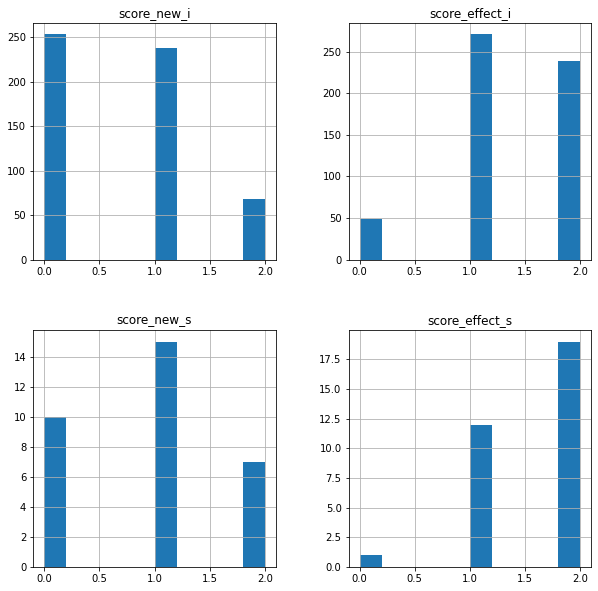

In [4]:
data.hist(figsize=(10, 10))
plt.show()

Вывод:
- по количеству оценок новизны идей преобладают 0(свыше 250) и 1(около 240) оценки, оценки 2 - около 60;
- оценка эффективности идей: "0" - 50, "1" - свыше 250, "2" - около 240;
- оценка новизны решений: "0" - 10, "1" - 15, "2" - 7;
- оценка эффективности решений: "0" - 1, "1" - 12, "2" - 18;

Проверим наличие пропущенных значений

In [5]:
data.isna().sum()

topic               0
resource           36
idea                0
score_new_i         0
score_effect_i      0
solution          527
score_new_s       527
score_effect_s    527
dtype: int64

Пропущены значения в ресурсе. После обсуждения с заказчиком, заполняем пропущенные значения "экспертами"

In [6]:
data['resource'] = data['resource'].fillna('эксперты')
data.isna().sum()

topic               0
resource            0
idea                0
score_new_i         0
score_effect_i      0
solution          527
score_new_s       527
score_effect_s    527
dtype: int64

Выведем общую информацию о данных

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 559 entries, 0 to 558
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   topic           559 non-null    object 
 1   resource        559 non-null    object 
 2   idea            559 non-null    object 
 3   score_new_i     559 non-null    int64  
 4   score_effect_i  559 non-null    int64  
 5   solution        32 non-null     object 
 6   score_new_s     32 non-null     float64
 7   score_effect_s  32 non-null     float64
dtypes: float64(2), int64(2), object(4)
memory usage: 35.1+ KB


Приведем данные к нужному типу

In [53]:
data['score_new_i'] = data['score_new_i'].astype('int')
data['score_effect_i'] = data['score_effect_i'].astype('int')

Проверим наличие явных дубликатов

In [10]:
data.duplicated().sum()

0

Проверим наличие неявных дубликатов

In [11]:
data['resource'].unique()

array(['ИИ', 'эксперты', 'эксперты '], dtype=object)

In [12]:
data = data.replace('эксперты ', 'эксперты')#заменим содержимое
data['resource'].unique()

array(['ИИ', 'эксперты'], dtype=object)

**Вывод:**
в ходе предварительной работы было сделано:
- переименованы столбцы,
- содержимое ячеек приведено к общему значению,
- изменен тип данных,
- построена общая гистограмма, которая показала, что:
    - по количеству оценок новизны идей преобладают 0(свыше 250) и 1(около 240) оценки, оценки 2 - около 60;
    - оценка эффективности идей: "0" - 50, "1" - свыше 250, "2" - около 240;
    - оценка новизны решений: "0" - 10, "1" - 15, "2" - 7;
    - оценка эффективности решений: "0" - 1, "1" - 12, "2" - 18.

## 3. Проверка гипотезы

Проверим гипотезу, что качество идей, сгенерированных при помощи экспертов выше, чем качество идей, сгенерированных при помощи искусственного интеллекта.

Посмотрим на средние значения в группах ИИ и эксперты

In [13]:
data.groupby('resource').agg({'score_new_i' : 'mean', 'score_effect_i' : 'mean',\
                              'score_new_s' : 'mean', 'score_effect_s' : 'mean'})\
                        .reset_index()

,resource,score_new_i,score_effect_i,score_new_s,score_effect_s
0,ИИ,0.53,1.21,0.79,1.37
1,эксперты,0.79,1.45,1.08,1.85


Посмотрим на количество идей и решений в группах ИИ и эксперты

In [14]:
data.groupby('resource').agg({'score_new_i' : 'count', 'score_new_s' : 'count'}).reset_index()

,resource,score_new_i,score_new_s
0,ИИ,261,19
1,эксперты,298,13


Сформируем группы для проверки наличия статистически значимой разницы между ними

In [15]:
data_ii = data.query('resource == "ИИ"') # группа ИИ
data_exp = data.query('resource != "ИИ"') # группа экспертов

In [16]:
data_ii_new_i, data_ii_ef_i = data_ii['score_new_i'], data_ii['score_effect_i']
data_exp_new_i, data_exp_ef_i = data_exp['score_new_i'], data_exp['score_effect_i']

In [17]:
data_ii_new_s, data_ii_ef_s = data_ii['score_new_s'], data_ii['score_effect_s']
data_exp_new_s, data_exp_ef_s = data_exp['score_new_s'], data_exp['score_effect_s']

Сформулируем гипотезы:
- Н0: средние показатели оценки новизны идей в группах равны,
- Н1: средние показатели оценки новизны идей в группах не равны

In [18]:
alpha = 0.05/2 #уровень стат. значимости

results = st.ttest_ind(data_ii_new_i, data_exp_new_i) # проводим стат. тест о равенстве оценок новизны идей, которые получили обе группы

# вывод на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравнение p-значение с alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 8.207265589833157e-06
Отвергаем нулевую гипотезу


Сформулируем гипотезы:
- Н0: средние показатели оценки эффективности идей в группах равны,
- Н1: средние показатели оценки эффективности идей в группах не равны

In [19]:
alpha = 0.05/2 #уровень стат. значимости

results = st.ttest_ind(data_ii_ef_i, data_exp_ef_i) # проводим стат. тест о равенстве оценок эффективности идей, которые получили обе группы

# вывод на экран получившееся p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравним p-значение с alpha
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.297254139822363e-06
Отвергаем нулевую гипотезу


**Вывод:** в ходе статистических проверок гипотез мы отвергли нулевые гипотезы о равенстве средних показателей в группах, то есть между группами "экспертов" и "ИИ" в оценке новизны и эффективности идей есть статистически значимая разница.

## 4. Исследовательский анализ данных

Сгруппируем информацию и построим графики

In [20]:
data_grouped = data.groupby('topic').agg({'resource' : 'unique', 'score_new_i' : 'mean', 'score_effect_i' : 'mean', 'idea' : 'count'}).reset_index().sort_values(by='idea')

In [21]:
data_grouped['sum'] = data_grouped['score_new_i'] + data_grouped['score_effect_i']
data_grouped.sort_values(by='sum')

,topic,resource,score_new_i,score_effect_i,idea,sum
1,Входная группа SAS,[ИИ],0.17,1.03,36,1.19
2,Здоровая еда,[ИИ],0.44,0.92,36,1.36
4,Обучение английскому языку,[эксперты],0.30,1.38,37,1.68
9,оценка дисциплин в SAS (COURSE EVALUATION),[ИИ],0.63,1.05,57,1.68
7,вход в общежитие,[эксперты],0.38,1.32,40,1.70
10,посещение поликлиники,[эксперты],0.51,1.30,37,1.81
0,Академическая деятельность студентов,[ИИ],0.56,1.35,66,1.91
11,услуги по созданию сайтов,[эксперты],0.50,1.59,44,2.09
5,Опыт жизни в общежитии,[ИИ],0.81,1.30,27,2.11
3,Модеус,[ИИ],0.56,1.59,39,2.15


**Посмотрим на оценку новизны идей при разделении на группы ИИ и экспертов**

In [22]:
data_score_new_i_0 = data.query('score_new_i == 0').groupby('resource').agg({'score_new_i' : 'count'}).reset_index()
data_score_new_i_0

,resource,score_new_i
0,ИИ,142
1,эксперты,111


In [23]:
data_score_new_i_1 = data.query('score_new_i == 1').groupby('resource').agg({'score_new_i' : 'count'}).reset_index()
data_score_new_i_1

,resource,score_new_i
0,ИИ,99
1,эксперты,139


In [24]:
data_score_new_i_2 = data.query('score_new_i == 2').groupby('resource').agg({'score_new_i' : 'count'}).reset_index()
data_score_new_i_2

,resource,score_new_i
0,ИИ,20
1,эксперты,48


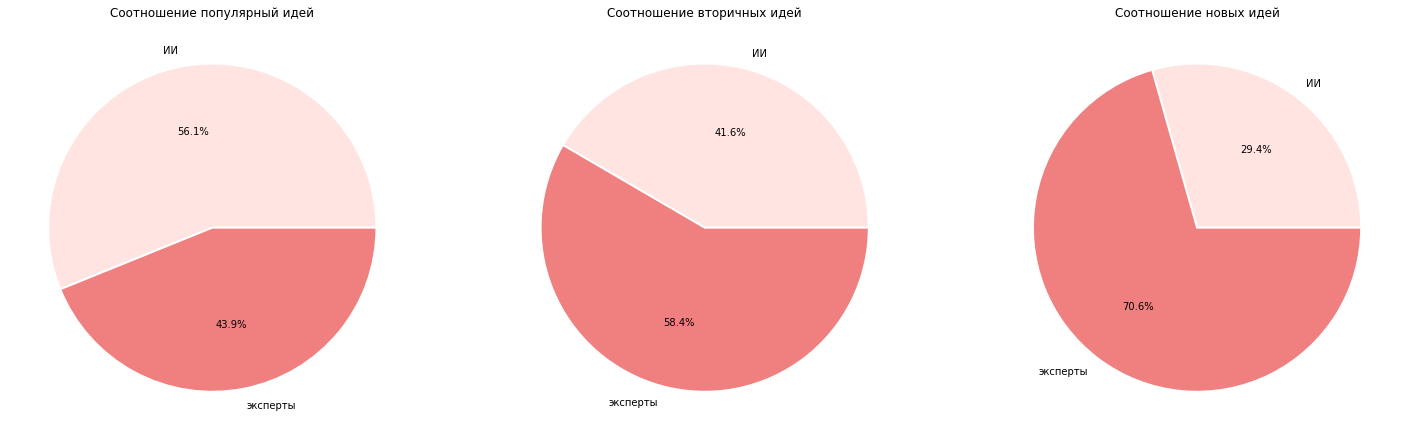

In [25]:
colors = ['#FFE4E1', '#F08080'] #установим цвета
labels=['ИИ', 'эксперты'] #установим названия для осей


fig, ax = plt.subplots(1, 3)
ax[0].pie(data_score_new_i_0['score_new_i'], labels=labels, colors=colors, labeldistance=1.1,\
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'}, autopct='%1.1f%%')
ax[0].set_title('Соотношение популярный идей') #установим название графика

ax[1].pie(data_score_new_i_1['score_new_i'], labels=labels, colors=colors, labeldistance=1.1,\
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'}, autopct='%1.1f%%')
ax[1].set_title('Соотношение вторичных идей') #установим название графика

ax[2].pie(data_score_new_i_2['score_new_i'], labels=labels, colors=colors, labeldistance=1.1,\
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'}, autopct='%1.1f%%')
ax[2].set_title('Соотношение новых идей') #установим название графика

fig.set_size_inches(25, 10)

plt.show()

Вывод: 
- доля новых идей(новизна идей = 2) в группе "экспертов" превышает долю идей в группе "ИИ" больше чем в два раза: 71% vs 29% (в количественном соотношении 48 vs 20);
- доля вторичных идей: "эксперты" 58%, "ИИ" 42% (в количественном соотношении 139 vs 99);
- доля популярных идей: "эксперты" 44%, "ИИ" 56% (в количественном соотношении 111 vs 142).

**Посмотрим, как распределяются идеи внутри групп "ИИ" и "экспертов" при оценке новизны**

Оценка новизны идей

In [26]:
data.groupby(['resource', 'score_new_i'])['topic'].count().reset_index()

,resource,score_new_i,topic
0,ИИ,0,142
1,ИИ,1,99
2,ИИ,2,20
3,эксперты,0,111
4,эксперты,1,139
5,эксперты,2,48


In [27]:
data_ii = data.query('resource == "ИИ"')
data_ii_new = data_ii.groupby('score_new_i')['topic'].count()
data_ii_effect = data_ii.groupby('score_effect_i')['topic'].count()

In [28]:
data_exp = data.query('resource == "эксперты"')
data_exp_new = data_exp.groupby('score_new_i')['topic'].count()
data_exp_effect = data_exp.groupby('score_effect_i')['topic'].count()

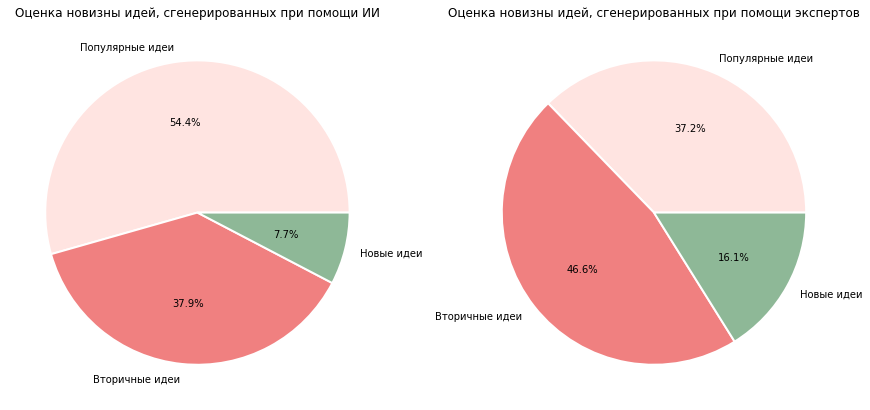

In [29]:
colors = ['#FFE4E1', '#F08080', '#8EB897'] #установим цвета
labels=['Популярные идеи', 'Вторичные идеи', 'Новые идеи'] #установим названия для осей


fig, ax = plt.subplots(1, 2)
ax[0].pie(data_ii_new, labels=labels, colors=colors, labeldistance=1.1,\
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'}, autopct='%1.1f%%')
ax[0].set_title('Оценка новизны идей, сгенерированных при помощи ИИ') #установим название графика

ax[1].pie(data_exp_new, labels=labels, colors=colors, labeldistance=1.1,\
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'}, autopct='%1.1f%%')
ax[1].set_title('Оценка новизны идей, сгенерированных при помощи экспертов') #установим название графика
fig.set_size_inches(15, 15)

plt.show()

Вывод: доля новых идей в группе "экспертов" составляет 16% от общего количества идей в группе, в группе "ИИ" - 8%.

**Посмотрим на оценку эффективности идей при разделении на группы "ИИ" и "экспертов"**

In [30]:
data_score_effect_i_0 = data.query('score_effect_i == 0').groupby('resource').agg({'score_effect_i' : 'count'}).reset_index()
data_score_effect_i_1 = data.query('score_effect_i == 1').groupby('resource').agg({'score_effect_i' : 'count'}).reset_index()
data_score_effect_i_2 = data.query('score_effect_i == 2').groupby('resource').agg({'score_effect_i' : 'count'}).reset_index()

In [31]:
display(data_score_effect_i_0, data_score_effect_i_1, data_score_effect_i_2)

,resource,score_effect_i
0,ИИ,30
1,эксперты,19


,resource,score_effect_i
0,ИИ,146
1,эксперты,125


,resource,score_effect_i
0,ИИ,85
1,эксперты,154


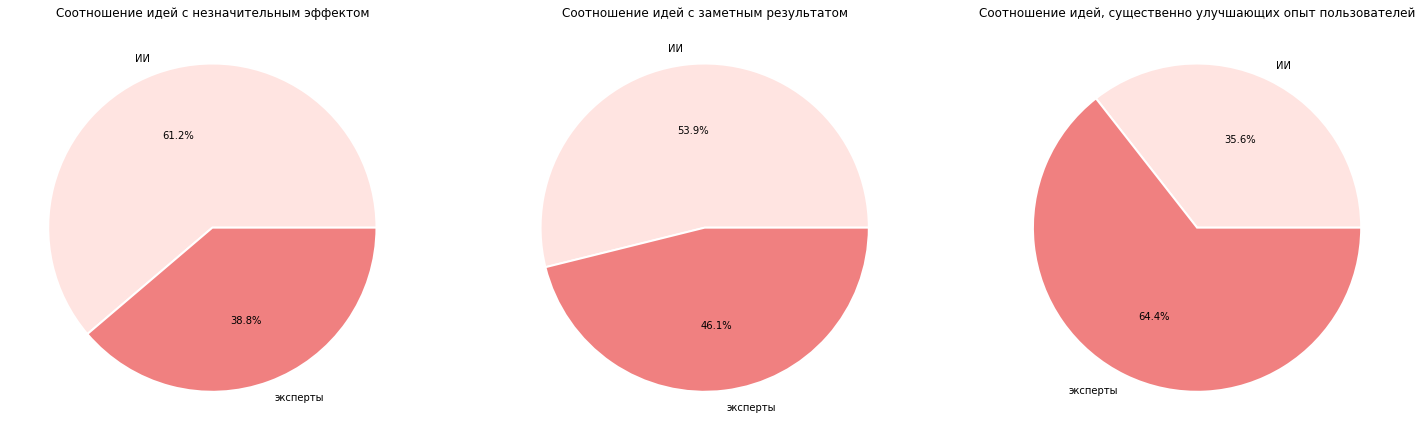

In [32]:
colors = ['#FFE4E1', '#F08080'] #установим цвета
labels=['ИИ', 'эксперты'] #установим названия для осей


fig, ax = plt.subplots(1, 3)
ax[0].pie(data_score_effect_i_0['score_effect_i'], labels=labels, colors=colors, labeldistance=1.1,\
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'}, autopct='%1.1f%%')
ax[0].set_title('Соотношение идей с незначительным эффектом') #установим название графика

ax[1].pie(data_score_effect_i_1['score_effect_i'], labels=labels, colors=colors, labeldistance=1.1,\
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'}, autopct='%1.1f%%')
ax[1].set_title('Соотношение идей с заметным результатом') #установим название графика

ax[2].pie(data_score_effect_i_2['score_effect_i'], labels=labels, colors=colors, labeldistance=1.1,\
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'}, autopct='%1.1f%%')
ax[2].set_title('Соотношение идей, существенно улучшающих опыт пользователей') #установим название графика

fig.set_size_inches(25, 10)

plt.show()

Вывод: 
- доля идей, существенно улучшающих опыт пользователей, в группе "эксперты" - 64%, в группе "ИИ" - 36% (в количественном соотношении: 154 vs 85);
- доля идей с заметным результатом: "эксперты" - 46%, "ИИ" - 54% (в количественном соотношении: 125 vs 146);
- доля идей с незначительным эффектом: "эксперты" - 39%, "ИИ" - 61% (в количественном соотношении: 19 vs 30)

**Посмотрим, как распределяются идеи внутри групп "ИИ" и "экспертов" при оценке эффективности**

In [33]:
data.groupby(['resource', 'score_effect_i'])['topic'].count().reset_index()

,resource,score_effect_i,topic
0,ИИ,0,30
1,ИИ,1,146
2,ИИ,2,85
3,эксперты,0,19
4,эксперты,1,125
5,эксперты,2,154


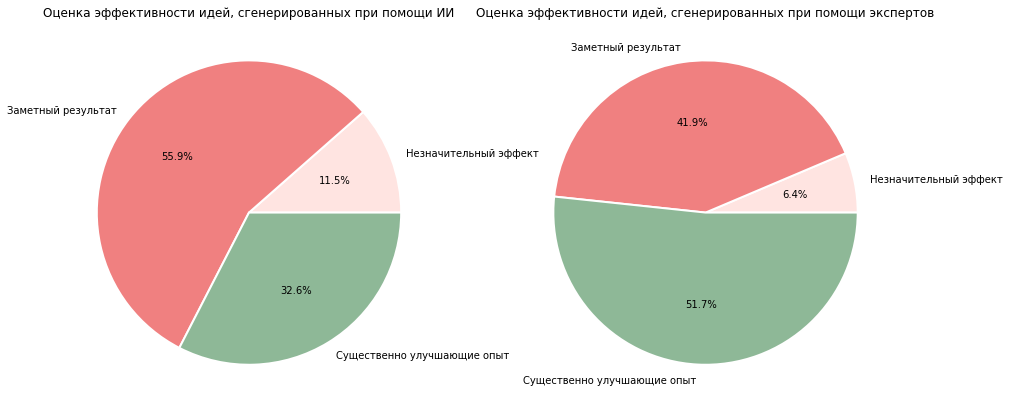

In [34]:
colors = ['#FFE4E1', '#F08080', '#8EB897'] #установим цвета
labels=['Незначительный эффект', 'Заметный результат', 'Существенно улучшающие опыт'] #установим названия для осей


fig, ax = plt.subplots(1, 2)
ax[0].pie(data_ii_effect, labels=labels, colors=colors, labeldistance=1.1,\
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'}, autopct='%1.1f%%')
ax[0].set_title('Оценка эффективности идей, сгенерированных при помощи ИИ') #установим название графика

ax[1].pie(data_exp_effect, labels=labels, colors=colors, labeldistance=1.1,\
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'}, autopct='%1.1f%%')
ax[1].set_title('Оценка эффективности идей, сгенерированных при помощи экспертов') #установим название графика
fig.set_size_inches(15, 15)

plt.show()

Вывод: доля идей, существенно улучшающих опыт, в группе "эксперты" составляет 52%, в группе "ИИ" - 33%.

**Посмотрим на оценку новизны решений при разделении на группы ИИ и экспертов**

In [35]:
data_score_new_s_0 = data.query('score_new_s == 0').groupby('resource').agg({'score_new_s' : 'count'}).reset_index()
data_score_new_s_1 = data.query('score_new_s == 1').groupby('resource').agg({'score_new_s' : 'count'}).reset_index()
data_score_new_s_2 = data.query('score_new_s == 2').groupby('resource').agg({'score_new_s' : 'count'}).reset_index()

In [36]:
display(data_score_new_s_0, data_score_new_s_1, data_score_new_s_2)

,resource,score_new_s
0,ИИ,9
1,эксперты,1


,resource,score_new_s
0,ИИ,5
1,эксперты,10


,resource,score_new_s
0,ИИ,5
1,эксперты,2


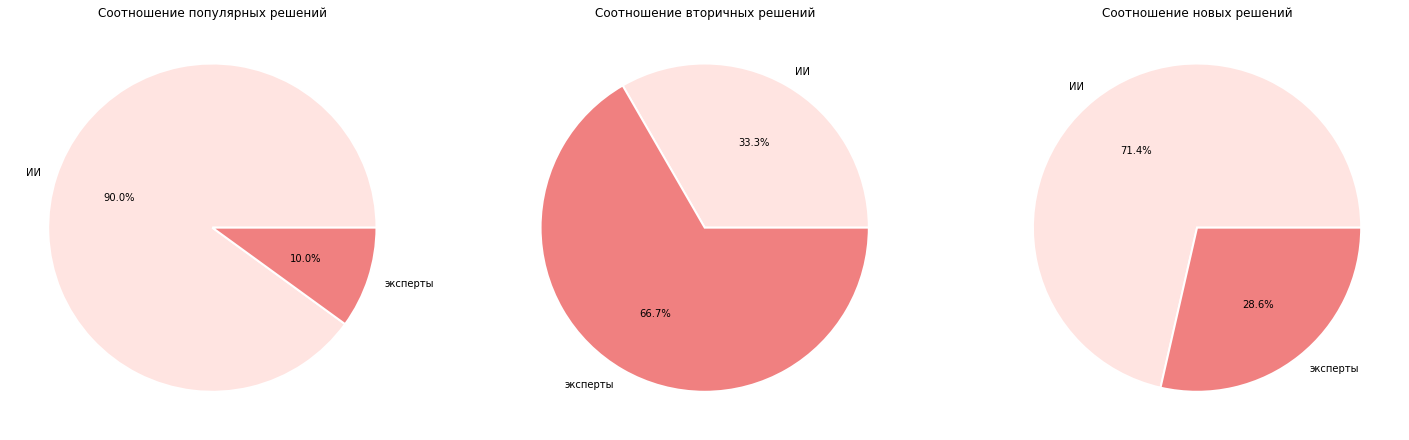

In [37]:
colors = ['#FFE4E1', '#F08080'] #установим цвета
labels=['ИИ', 'эксперты'] #установим названия для осей


fig, ax = plt.subplots(1, 3)
ax[0].pie(data_score_new_s_0['score_new_s'], labels=labels, colors=colors, labeldistance=1.1,\
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'}, autopct='%1.1f%%')
ax[0].set_title('Соотношение популярныx решений') #установим название графика

ax[1].pie(data_score_new_s_1['score_new_s'], labels=labels, colors=colors, labeldistance=1.1,\
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'}, autopct='%1.1f%%')
ax[1].set_title('Соотношение вторичных решений') #установим название графика

ax[2].pie(data_score_new_s_2['score_new_s'], labels=labels, colors=colors, labeldistance=1.1,\
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'}, autopct='%1.1f%%')
ax[2].set_title('Соотношение новых решений') #установим название графика

fig.set_size_inches(25, 10)

plt.show()

Вывод: 
- доля новых решений (оценка новизны = 2) в группе "эксперты" - 29%, в группе "ИИ" - 71% (в количественном соотношении: 2 vs 5);
- доля вторичных решений: "эксперты" - 67%, "ИИ" - 33% (в количественном соотношении: 10 vs 5);
- доля популярных решений: "эксперты" - 10%, "ИИ" - 90% (в количественном соотношении: 1 vs 9)

**Посмотрим, как распределяются решения внутри групп "ИИ" и "экспертов" при оценке новизны**

In [38]:
data_ii_new_s = data_ii.groupby('score_new_s')['topic'].count()
data_ii_effect_s = data_ii.groupby('score_effect_s')['topic'].count()

In [39]:
data_exp_new_s = data_exp.groupby('score_new_s')['topic'].count()
data_exp_effect_s = data_exp.groupby('score_effect_s')['topic'].count()

Оценка новизны решений

In [40]:
data.groupby(['resource', 'score_new_s'])['topic'].count().reset_index()

,resource,score_new_s,topic
0,ИИ,0.00,9
1,ИИ,1.00,5
2,ИИ,2.00,5
3,эксперты,0.00,1
4,эксперты,1.00,10
5,эксперты,2.00,2


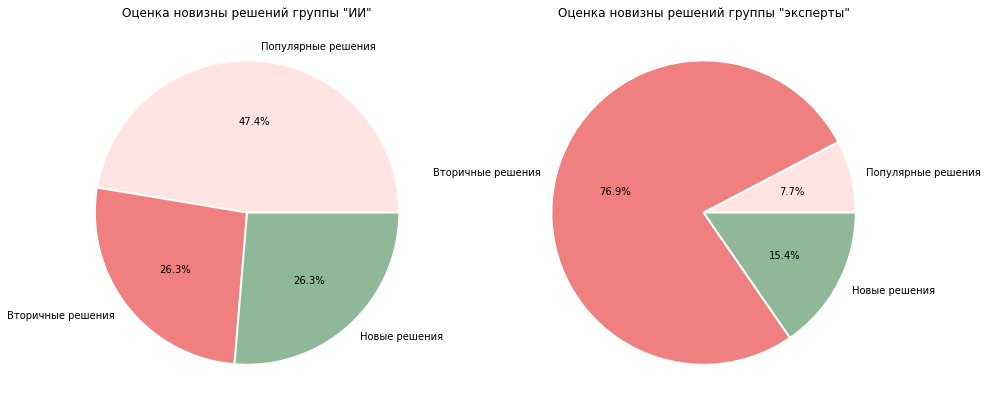

In [41]:
colors = ['#FFE4E1', '#F08080', '#8EB897'] #установим цвета
labels=['Популярные решения', 'Вторичные решения', 'Новые решения'] #установим названия для осей


fig, ax = plt.subplots(1, 2)
ax[0].pie(data_ii_new_s, labels=labels, colors=colors, labeldistance=1.1,\
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'}, autopct='%1.1f%%')
ax[0].set_title('Оценка новизны решений группы "ИИ"') #установим название графика

ax[1].pie(data_exp_new_s, labels=labels, colors=colors, labeldistance=1.1,\
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'}, autopct='%1.1f%%')
ax[1].set_title('Оценка новизны решений группы "эксперты"') #установим название графика
fig.set_size_inches(15, 15)

plt.show()

Вывод: доля новых решений в группе "экспертов" составляет 15%, в группе "ИИ" - 26%.

**Посмотрим на оценку эффективности решений при разделении на группы ИИ и экспертов**

In [42]:
data_score_effect_s_0 = data.query('score_effect_s == 0').groupby('resource').agg({'score_effect_s' : 'count'}).reset_index()
data_score_effect_s_1 = data.query('score_effect_s == 1').groupby('resource').agg({'score_effect_s' : 'count'}).reset_index()
data_score_effect_s_2 = data.query('score_effect_s == 2').groupby('resource').agg({'score_effect_s' : 'count'}).reset_index()

In [43]:
display(data_score_effect_s_0, data_score_effect_s_1, data_score_effect_s_2)

,resource,score_effect_s
0,ИИ,1


,resource,score_effect_s
0,ИИ,10
1,эксперты,2


,resource,score_effect_s
0,ИИ,8
1,эксперты,11


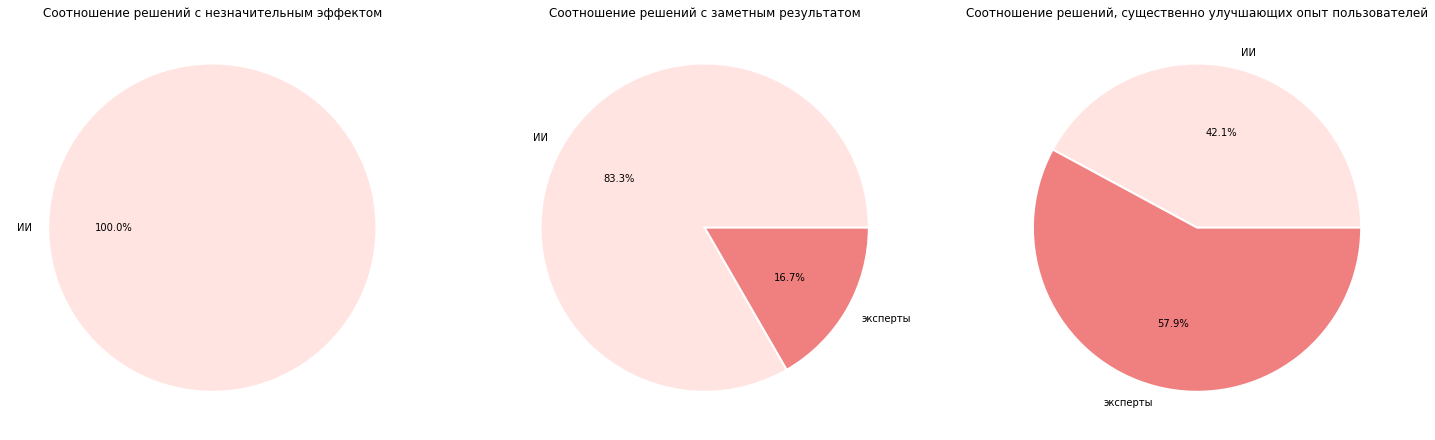

In [44]:
colors = ['#FFE4E1', '#F08080'] #установим цвета
labels=['ИИ', 'эксперты'] #установим названия для осей
colors2 = ['#FFE4E1']
labels2 = ['ИИ']

fig, ax = plt.subplots(1, 3)
ax[0].pie(data_score_effect_s_0['score_effect_s'], labels=labels2, colors=colors2, labeldistance=1.1,\
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'}, autopct='%1.1f%%')
ax[0].set_title('Соотношение решений с незначительным эффектом') #установим название графика

ax[1].pie(data_score_effect_s_1['score_effect_s'], labels=labels, colors=colors, labeldistance=1.1,\
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'}, autopct='%1.1f%%')
ax[1].set_title('Соотношение решений с заметным результатом') #установим название графика

ax[2].pie(data_score_effect_s_2['score_effect_s'], labels=labels, colors=colors, labeldistance=1.1,\
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'}, autopct='%1.1f%%')
ax[2].set_title('Соотношение решений, существенно улучшающих опыт пользователей') #установим название графика

fig.set_size_inches(25, 10)

plt.show()

Вывод: 
- доля решений, существенно улучшающих опыт пользователей, в группе "экспертов" составляет - 58%, в группе "ИИ" - 42% (в количественном соотношении: 11 vs 8);
- доля решений с заметным результатом: "эксперты" - 17%, "ИИ" - 83% (в количественном соотношении: 2 vs 10);
- доля решений с незначительным эффектом: "эксперты" - 0%, "ИИ" - 100% (в количественном соотношении: 0 vs 1)

**Посмотрим, как распределяются решения внутри групп "ИИ" и "экспертов" при оценке эффективности**

In [45]:
data.groupby(['resource', 'score_effect_s'])['topic'].count().reset_index()

,resource,score_effect_s,topic
0,ИИ,0.00,1
1,ИИ,1.00,10
2,ИИ,2.00,8
3,эксперты,1.00,2
4,эксперты,2.00,11


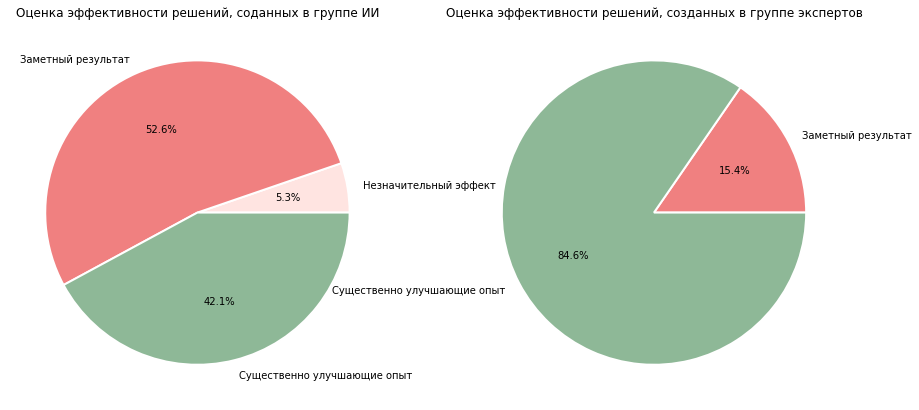

In [46]:
colors1 = ['#FFE4E1', '#F08080', '#8EB897']
colors2 = ['#F08080', '#8EB897']#установим цвета
labels1=['Незначительный эффект', 'Заметный результат', 'Существенно улучшающие опыт'] #установим названия для осей
labels2=['Заметный результат', 'Существенно улучшающие опыт']

fig, ax = plt.subplots(1, 2)
ax[0].pie(data_ii_effect_s, labels=labels1, colors=colors1, labeldistance=1.1,\
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'}, autopct='%1.1f%%')
ax[0].set_title('Оценка эффективности решений, соданных в группе ИИ') #установим название графика

ax[1].pie(data_exp_effect_s, labels=labels2, colors=colors2, labeldistance=1.1,\
        wedgeprops={'linewidth' : 2, 'edgecolor' : 'white'}, autopct='%1.1f%%')
ax[1].set_title('Оценка эффективности решений, созданных в группе экспертов') #установим название графика
fig.set_size_inches(15, 15)

plt.show()

Вывод: доля решений, существенно улучшающих опыт пользователей, в группе "экспертов" составляет 85%, в группе "ИИ" - 42%.

In [51]:
data

,topic,resource,idea,score_new_i,score_effect_i,solution,score_new_s,score_effect_s
0,оценка дисциплин в SAS (COURSE EVALUATION),ИИ,Администрация пишет комплименты и поощрения пе...,1,0,Новая страница на сайте SAS со всеми изменения...,2.00,2.00
1,оценка дисциплин в SAS (COURSE EVALUATION),ИИ,Day inverse.День обратный. Учащиеся читают сво...,1,1,Коллекционирование лягушек: геймификация,0.00,1.00
2,оценка дисциплин в SAS (COURSE EVALUATION),ИИ,Концерт,2,1,Новая Teaching Policy: заполнение в классе,0.00,0.00
3,оценка дисциплин в SAS (COURSE EVALUATION),ИИ,"Организовывать встречи со студентами, когда ре...",0,2,Новые переформулированные вопросы и порядок во...,0.00,2.00
4,оценка дисциплин в SAS (COURSE EVALUATION),ИИ,Нарисованный отчет,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
554,Опыт жизни в общежитии,ИИ,обязанность клининг-сервиса,1,1,NaN,NaN,NaN
555,Опыт жизни в общежитии,ИИ,увеличить количество (время) рабочих часов,0,1,NaN,NaN,NaN
556,Опыт жизни в общежитии,ИИ,разрешить брать сразу 2 комплекта,0,0,NaN,NaN,NaN
557,Опыт жизни в общежитии,ИИ,личная доверенность для гостей общежития,0,1,NaN,NaN,NaN


**Посмотрим на корреляцию между новизной идей и решений**

In [49]:
data['score_new_i'].corr(data['score_new_s'])

0.3244933745945566

**Посмотрим на корреляцию между эффективностью идей и решений**

In [52]:
data['score_effect_i'].corr(data['score_effect_s'])

0.29931715330852116

## 5. Общий вывод

В ходе работы над проектом нами сделано:
1. Построена общая гистограмма, показывающая, что:
    - по количеству оценок новизны идей преобладают "0"(свыше 250) и "1"(около 240) оценки, оценки "2" - около 60;
    - оценка эффективности идей: "0" - 50, "1" - свыше 250, "2" - около 240;
    - оценка новизны решений: "0" - 10, "1" - 15, "2" - 7;
    - оценка эффективности решений: "0" - 1, "1" - 12, "2" - 18.
        
2. Проверена гипотеза, что качество идей, сгенерированных при помощи экспертов выше, чем качество идей, сгенерированных при помощи искусственного интеллекта.
После проведения t-теста отвергнуты нулевые гипотезы о равенстве средних показателей в группах, то есть между группами "экспертов" и "ИИ" в оценке новизны и эффективности идей есть статистически значимая разница.

3. Исследовано соотношение новизны идей:
- доля новых идей(новизна идей = 2) в группе "экспертов" превышает долю идей в группе "ИИ" больше чем в два раза: 71% vs 29% (в количественном соотношении 48 vs 20);
- доля вторичных идей: "эксперты" 58%, "ИИ" 42% (в количественном соотношении 139 vs 99);
- доля популярных идей: "эксперты" 44%, "ИИ" 56% (в количественном соотношении 111 vs 142).

А также, что доля новых идей в группе "экспертов" составляет 16% от общего количества идей в группе, в группе "ИИ" - 8%.

4. Исследовано соотношение эффективности идей:
- доля идей, существенно улучшающих опыт пользователей, в группе "эксперты" - 64%, в группе "ИИ" - 36% (в количественном соотношении: 154 vs 85);
- доля идей с заметным результатом: "эксперты" - 46%, "ИИ" - 54% (в количественном соотношении: 125 vs 146);
- доля идей с незначительным эффектом: "эксперты" - 39%, "ИИ" - 61% (в количественном соотношении: 19 vs 30)

А также, что доля идей, существенно улучшающих опыт пользователей, в группе "эксперты" составляет 52%, в группе "ИИ" - 33%.

5. Исследовано соотношение новизны решений:
- доля новых решений (оценка новизны = 2) в группе "эксперты" - 29%, в группе "ИИ" - 71% (в количественном соотношении: 2 vs 5);
- доля вторичных решений: "эксперты" - 67%, "ИИ" - 33% (в количественном соотношении: 10 vs 5);
- доля популярных решений: "эксперты" - 10%, "ИИ" - 90% (в количественном соотношении: 1 vs 9)

А также, что доля новых решений в группе "экспертов" составляет 15%, в группе "ИИ" - 26%.

6. Исследовано соотношение эффективности решений:
- доля решений, существенно улучшающих опыт пользователей, в группе "экспертов" составляет - 58%, в группе "ИИ" - 42% (в количественном соотношении: 11 vs 8);
- доля решений с заметным результатом: "эксперты" - 17%, "ИИ" - 83% (в количественном соотношении: 2 vs 10);
- доля решений с незначительным эффектом: "эксперты" - 0%, "ИИ" - 100% (в количественном соотношении: 0 vs 1)


А также, доля решений, существенно улучшающих опыт пользователей, в группе "экспертов" составляет 85%, в группе "ИИ" - 42%.

7. Корреляция между новизной идей и новизной решений составляет - 0.324. Корреляция между эффективностью идей и эффективностью решений составляет - 0.299.
